# Volume 4: Linear Quadratic Gaussian Control
    Daniel Perkins
    MATH 439
    2/5/25

In [1]:
import numpy as np
from jax import numpy as jnp
from scipy.linalg import inv
from matplotlib import pyplot as plt

from utils import Simulator, Estimator, Controller
from animate import animate2d

# Problem 1

In [3]:
class LQR:
    """
    Given a transition system and cost matrices, compute an optimal trajectory,
    an associated control, and an optimal control rule given state feedback.
    """

    def __init__(self, Q, M, R, A, B, N):
        # Store the attributes
        self.Q = Q
        self.M = M
        self.R = R
        self.A = A
        self.B = B
        self.N = N

    def fit(self):
        """
        Computes and saves the gain matrices Ks
        """
        # Initialize empty arrays for K and P
        Ks = [None] * self.N
        Ps = np.empty((self.N+1, self.M.shape[0], self.M.shape[1]))
        Ps[self.N] = self.M  # 24.5
        
        for k in range(self.N, 0, -1):  # Equations 24.3 and 24.4
            Ks[k-1] = -inv(self.R + self.B.T @ Ps[k] @ self.B) @ self.B.T @ Ps[k] @ self.A
            Ps[k-1] = self.Q + self.A.T @ Ps[k] @ self.A - self.A.T @ Ps[k] @ self.B @ (-Ks[k-1])
            
        self.Ks = Ks

    def compute_control(self, k, x_k):
        """
        Returns the optimal control uk

        Parameters:
            k (int) - The index of the state vector
            x_k (ndarray) - The state at index k

        Returns:
            u_k (ndarray) - The optimal control at index k
        """
        return self.Ks[k] @ x_k

# Problem 2

In [8]:
delta_t = 1/10.

# x_k = Ax_{k-1} + Bu_{k-1}
# Create first evolution matrix A
A = np.eye(6)
A[0, 3], A[1, 4], A[2, 5] = delta_t, delta_t, delta_t

# Create second evolution matrix B
B = np.zeros((6, 3))
B[3, 0], B[4, 1], B[5, 2] = delta_t, delta_t, delta_t


# Problem 3

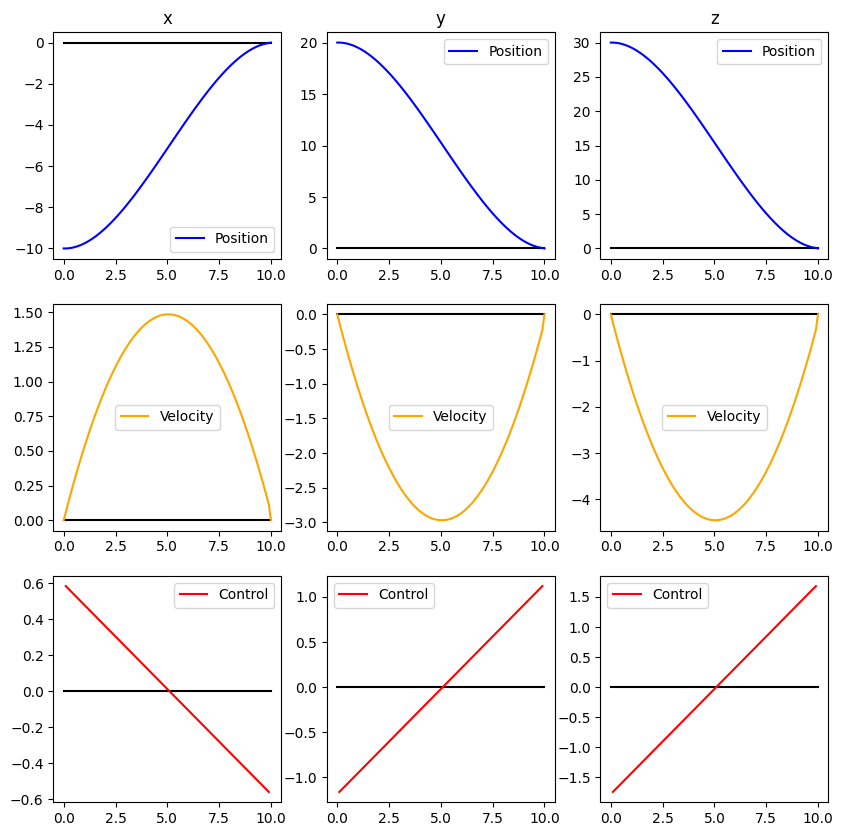

In [65]:
# Intialize things
x0 = np.array([-10., 20., 30., 0., 0., 0.])
n = 6
N = 100
Q = np.zeros((n, n))
M = np.eye(n)*50
R = np.eye(3)
xs = np.empty((N+1, n))
us = np.empty((N, 3))
xs[0] = x0
x = x0

# Fit the LQR
lqr = LQR(Q, M, R, A, B, N)
lqr.fit()

def f(x, u):
    """Return dx/dt using equation (24.7)."""
    return np.concatenate([x[3:], u])

# Set the initial state of the simulation.
sim = Simulator(f, delta_t, n)
sim.set_initial_state(x0)

for i in range(1, N):
    # Compute the control u0
    u = lqr.compute_control(i, x)
    us[i] = u

    # Evolve the system
    sim.evolve(u)

    # 3. Get the next true state.
    # (`Simulator` assumes the observation matrix H is the identity.)
    x = sim.observe()
    xs[i] = x

# Plot x
ts = delta_t * np.arange(N+1)
plt.figure(figsize=(10, 10))
plt.subplot(331)
plt.title("x")
plt.plot(ts, ts*0, color="black")
plt.plot(ts, xs[:,0], label="Position", color="blue")
plt.legend()

# Plot y
plt.subplot(332)
plt.title("y")
plt.plot(ts, ts*0, color="black")
plt.plot(ts, xs[:,1], label="Position", color="blue")
plt.legend()

# Plot z
plt.subplot(333)
plt.title("z")
plt.plot(ts, ts*0, color="black")
plt.plot(ts, xs[:,2], label="Position", color="blue")
plt.legend()

# Plot x'
plt.subplot(334)
plt.plot(ts, ts*0, color="black")
plt.plot(ts, xs[:,3], label="Velocity", color="orange")
plt.legend()

# Plot y'
plt.subplot(335)
plt.plot(ts, ts*0, color="black")
plt.plot(ts, xs[:,4], label="Velocity", color="orange")
plt.legend()

# Plot z'
plt.subplot(336)
plt.plot(ts, ts*0, color="black")
plt.plot(ts, xs[:,5], label="Velocity", color="orange")
plt.legend()

# Plot x''
plt.subplot(337)
plt.plot(ts, ts*0, color="black")
plt.plot(ts[1:-1], us[1:,0], label="Control", color="red")
plt.legend()

# Plot y''
plt.subplot(338)
plt.plot(ts, ts*0, color="black")
plt.plot(ts[1:-1], us[1:,1], label="Control", color="red")
plt.legend()

# Plot z''
plt.subplot(339)
plt.plot(ts, ts*0, color="black")
plt.plot(ts[1:-1], us[1:,2], label="Control", color="red")
plt.legend()

plt.show()

# Problem 4

In [ ]:
class KalmanFilter:
    """
    Implementation of the Kalman Filter

    Given observations and a model, estimates true states by blending the model and observations according to approximated error
    """

    def __init__(self):
        raise (NotImplementedError)

    def fit(self):
        """
        Computes and saves the gain matrices Lks
        """
        raise (NotImplementedError)

    def predict_state(self):
        """
        Returns the next predicted state

        Parameters:
            x_k (ndarray) - The last estimated state
            u_k (ndarray) - The control at the given index

        Returns:
            x_k1|k (ndarray) - The next predicted state
        """
        raise (NotImplementedError)

    def update_state(self):
        """
        Returns the next estimated state

        Parameters:
            k (int) - The index of the state
            x_k1|k (ndarray) - The next predicted state
            z_k1 (ndarray) - The observations at the given index

        Returns:
            x_k1 (ndarray) - The next estimated state
        """
        raise (NotImplementedError)

# Problem 5

# Problem 6